# Lab 8 Azfar Nazrin Affandi IS01081493

### TEXT CLUSTERING USING TF-IDF VECTORIZER

In [3]:
import numpy as np
from sklearn.cluster import KMeans
from sklearn.feature_extraction.text import TfidfVectorizer
from tabulate import tabulate
from collections import Counter


dataset = ["I love playing football on the weekends",
 "I enjoy hiking and camping in the mountains",
 "I like to read books and watch movies",
 "I prefer playing video games over sports",
 "I love listening to music and going to concerts"]

vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(dataset)

k = 2 # Define the number of clusters

km = KMeans(n_clusters=k)
km.fit(X)

# Predict the clusters for each document
y_pred = km.predict(X)

# Display the document and its predicted cluster in a table
table_data = [["Document", "Predicted Cluster"]]
table_data.extend([[doc, cluster] for doc, cluster in zip(dataset, y_pred)])
print(tabulate(table_data, headers="firstrow"))



# Print top terms per cluster
print("\nTop terms per cluster:")
order_centroids = km.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.get_feature_names_out()
for i in range(k):
     print("Cluster %d:" % i)
     for ind in order_centroids[i, :10]:
         print(' %s' % terms[ind])
     print()

    
    
# Calculate purity
total_samples = len(y_pred)
cluster_label_counts = [Counter(y_pred)]
purity = sum(max(cluster.values()) for cluster in cluster_label_counts) / total_samples
print("Purity:", purity)

Document                                           Predicted Cluster
-----------------------------------------------  -------------------
I love playing football on the weekends                            1
I enjoy hiking and camping in the mountains                        1
I like to read books and watch movies                              0
I prefer playing video games over sports                           1
I love listening to music and going to concerts                    0

Top terms per cluster:
Cluster 0:
 to
 and
 read
 watch
 movies
 like
 books
 concerts
 going
 music

Cluster 1:
 playing
 the
 weekends
 on
 football
 video
 sports
 prefer
 over
 games

Purity: 0.6


C:\Users\cyber\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


### TEXT CLUSTERING USING WORD2VEC VECTORIZER

In [2]:
import numpy as np
from sklearn.cluster import KMeans
from gensim.models import Word2Vec
from tabulate import tabulate
from collections import Counter


In [4]:
dataset = ["I love playing football on the weekends",
 "I enjoy hiking and camping in the mountains",
 "I like to read books and watch movies",
 "I prefer playing video games over sports",
 "I love listening to music and going to concerts"]

tokenized_dataset = [doc.split() for doc in dataset]
word2vec_model = Word2Vec(sentences=tokenized_dataset, vector_size=100,
window=5, min_count=1, workers=4)

X = np.array([np.mean([word2vec_model.wv[word] for word in doc.split() if word in
word2vec_model.wv], axis=0) for doc in dataset])

k = 2 # Define the number of clusters
km = KMeans(n_clusters=k)
km.fit(X)

# Predict the clusters for each document
y_pred = km.predict(X)

# Tabulate the document and predicted cluster
table_data = [["Document", "Predicted Cluster"]]
table_data.extend([[doc, cluster] for doc, cluster in zip(dataset, y_pred)])
print(tabulate(table_data, headers="firstrow"))


# Calculate purity
total_samples = len(y_pred)
cluster_label_counts = [Counter(y_pred)]
purity = sum(max(cluster.values()) for cluster in cluster_label_counts) / total_samples
print("Purity:", purity)

C:\Users\cyber\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\cyber\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Document                                           Predicted Cluster
-----------------------------------------------  -------------------
I love playing football on the weekends                            1
I enjoy hiking and camping in the mountains                        1
I like to read books and watch movies                              0
I prefer playing video games over sports                           1
I love listening to music and going to concerts                    0
Purity: 0.6


# EXERCISE:
### 1. Modify the codes for both TF-IDF & Word2Vec vectorizer by adding text preprocessing steps. Do the Purity differ when applying text preprocessing before vectorization?


### TF-IDF vectorizer by adding text preprocessing steps

In [5]:
import numpy as np
from sklearn.cluster import KMeans
from sklearn.feature_extraction.text import TfidfVectorizer
from tabulate import tabulate
from collections import Counter
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import re

In [6]:
# Sample dataset
dataset = ["I love playing football on the weekends",
           "I enjoy hiking and camping in the mountains",
           "I like to read books and watch movies",
           "I prefer playing video games over sports",
           "I love listening to music and going to concerts"]

# Step 3: Preprocessing
nltk.download('stopwords')
nltk.download('wordnet')
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def preprocess(text):
    # Remove non-alphabetic characters and lowercase
    text = re.sub(r'[^a-zA-Z]', ' ', text.lower())
    # Tokenize
    tokens = text.split()
    # Remove stopwords and lemmatize
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]
    # Join tokens back into a string
    return ' '.join(tokens)

preprocessed_dataset = [preprocess(doc) for doc in dataset]

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\cyber\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\cyber\AppData\Roaming\nltk_data...


In [7]:
preprocessed_dataset

['love playing football weekend',
 'enjoy hiking camping mountain',
 'like read book watch movie',
 'prefer playing video game sport',
 'love listening music going concert']

In [8]:
# Vectorize the dataset
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(preprocessed_dataset)

In [9]:
# Define the number of clusters
k = 2

In [10]:
# Create a k-means model and fit it to the data
km = KMeans(n_clusters=k)
km.fit(X)

C:\Users\cyber\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=2)

In [13]:
# Predict the clusters for each document
y_pred = km.predict(X)

# Display the document and its predicted cluster in a table
table_data = [["Document", "Predicted Cluster"]]
table_data.extend([[doc, cluster] for doc, cluster in zip(dataset, y_pred)])
print(tabulate(table_data, headers="firstrow"))

Document                                           Predicted Cluster
-----------------------------------------------  -------------------
I love playing football on the weekends                            1
I enjoy hiking and camping in the mountains                        0
I like to read books and watch movies                              1
I prefer playing video games over sports                           1
I love listening to music and going to concerts                    1


In [15]:
# Print top terms per cluster
print("\nTop terms per cluster:")
order_centroids = km.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.get_feature_names_out()
for i in range(k):
    print("Cluster %d:" % i)
    for ind in order_centroids[i, :10]:
        print(' %s' % terms[ind])
    print()


Top terms per cluster:
Cluster 0:
 camping
 enjoy
 hiking
 mountain
 weekend
 listening
 concert
 football
 game
 going

Cluster 1:
 love
 playing
 football
 weekend
 going
 sport
 music
 concert
 video
 game



In [16]:
# Calculate purity
total_samples = len(y_pred)
cluster_label_counts = [Counter(y_pred)]
purity = sum(max(cluster.values()) for cluster in cluster_label_counts) / total_samples

print("Purity:", purity)

Purity: 0.8


### Word2Vec vectorizer by adding text preprocessing steps

In [17]:
# Step 1: Import the libraries
import numpy as np
from sklearn.cluster import KMeans
from gensim.models import Word2Vec
from tabulate import tabulate
from collections import Counter
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import re

# Step 2: Create the documents
dataset = ["I love playing football on the weekends",
           "I enjoy hiking and camping in the mountains",
           "I like to read books and watch movies",
           "I prefer playing video games over sports",
           "I love listening to music and going to concerts"]


# Step 3: Preprocessing
nltk.download('stopwords')
nltk.download('wordnet')
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def preprocess(text):
    # Remove non-alphabetic characters and lowercase
    text = re.sub(r'[^a-zA-Z]', ' ', text.lower())
    # Tokenize
    tokens = text.split()
    # Remove stopwords and lemmatize
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]
    # Join tokens back into a string
    return ' '.join(tokens)

preprocessed_dataset = [preprocess(doc) for doc in dataset]

# Step 3: Train Word2Vec model
tokenized_dataset = [doc.split() for doc in preprocessed_dataset]
word2vec_model = Word2Vec(sentences=tokenized_dataset, vector_size=100, window=5, min_count=1, workers=4)

# Step 4: Create document embeddings
X = np.array([np.mean([word2vec_model.wv[word] for word in doc.split() if word in word2vec_model.wv], axis=0) for doc in dataset])

# Step 5: Perform clustering
k = 2  # Define the number of clusters
km = KMeans(n_clusters=k)
km.fit(X)

# Predict the clusters for each document
y_pred = km.predict(X)

# Tabulate the document and predicted cluster
table_data = [["Document", "Predicted Cluster"]]
table_data.extend([[doc, cluster] for doc, cluster in zip(dataset, y_pred)])
print(tabulate(table_data, headers="firstrow"))

# Calculate purity
total_samples = len(y_pred)
cluster_label_counts = [Counter(y_pred)]
purity = sum(max(cluster.values()) for cluster in cluster_label_counts) / total_samples

print("Purity:", purity)

Document                                           Predicted Cluster
-----------------------------------------------  -------------------
I love playing football on the weekends                            1
I enjoy hiking and camping in the mountains                        0
I like to read books and watch movies                              0
I prefer playing video games over sports                           1
I love listening to music and going to concerts                    0
Purity: 0.6


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\cyber\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\cyber\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
C:\Users\cyber\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\cyber\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


### 2. Perform text clustering on 'customer_complaints_1.csv' dataset, specifically the Text column.

In [19]:
#import pandas module for creating dataframe
import pandas as pd

#read CSV into DataFrame
data = pd.read_csv("customer_complaints_1.csv")
data

,author,posted_on,rating,text
0,"Alantae of Chesterfeild, MI","Nov. 22, 2016",1,I used to love Comcast. Until all these consta...
1,"Vera of Philadelphia, PA","Nov. 19, 2016",1,I'm so over Comcast! The worst internet provid...
2,"Sarah of Rancho Cordova, CA","Nov. 17, 2016",1,If I could give them a negative star or no sta...
3,"Dennis of Manchester, NH","Nov. 16, 2016",1,I've had the worst experiences so far since in...
4,"Ryan of Bellevue, WA","Nov. 14, 2016",1,Check your contract when you sign up for Comca...
5,"Terri of Mobile, AL","Nov. 9, 2016",1,Thank God. I am changing to Dish. They gave me...
6,"Kellie of Salt Lake City, UT","Nov. 9, 2016",1,I Have been a long time customer and only have...
7,"Kathleen of New Haven, CT","Nov. 6, 2016",2,There is a malfunction on the DVR manager whic...
8,"Shira of Bloomfield, NJ","Nov. 5, 2016",1,Charges overwhelming. Comcast service rep was ...
9,"Kristy of Alpharetta, GA","Nov. 2, 2016",1,"I have had cable, DISH, and U-verse, etc. in t..."


In [20]:
#import string module for string manipulation
import string


#The constant in string module to remove punctuations
string.punctuation

#defining the function to remove punctuations in the documents
def remove_punctuation(text):
    #punctuationfree = "".join([i for i in text if i not in string.punctuation])
    #return punctuationfree
    # Initialize an empty string to store the result
    punctuation_free = ""
    
    # Iterate over each character in the text
    for i in text:
        # Check if the character is not in the string.punctuation set
        if i not in string.punctuation:
            # If not, add the character to the result string
            punctuation_free += i
    
    return punctuation_free

#applying the remove_punctuation function to the 'Review' column and storing the result in a new column 'clean_punctuation'
data['clean_punctuation']= data['text'].apply(remove_punctuation)
data

,author,posted_on,rating,text,clean_punctuation
0,"Alantae of Chesterfeild, MI","Nov. 22, 2016",1,I used to love Comcast. Until all these consta...,I used to love Comcast Until all these constan...
1,"Vera of Philadelphia, PA","Nov. 19, 2016",1,I'm so over Comcast! The worst internet provid...,Im so over Comcast The worst internet provider...
2,"Sarah of Rancho Cordova, CA","Nov. 17, 2016",1,If I could give them a negative star or no sta...,If I could give them a negative star or no sta...
3,"Dennis of Manchester, NH","Nov. 16, 2016",1,I've had the worst experiences so far since in...,Ive had the worst experiences so far since ins...
4,"Ryan of Bellevue, WA","Nov. 14, 2016",1,Check your contract when you sign up for Comca...,Check your contract when you sign up for Comca...
5,"Terri of Mobile, AL","Nov. 9, 2016",1,Thank God. I am changing to Dish. They gave me...,Thank God I am changing to Dish They gave me a...
6,"Kellie of Salt Lake City, UT","Nov. 9, 2016",1,I Have been a long time customer and only have...,I Have been a long time customer and only have...
7,"Kathleen of New Haven, CT","Nov. 6, 2016",2,There is a malfunction on the DVR manager whic...,There is a malfunction on the DVR manager whic...
8,"Shira of Bloomfield, NJ","Nov. 5, 2016",1,Charges overwhelming. Comcast service rep was ...,Charges overwhelming Comcast service rep was s...
9,"Kristy of Alpharetta, GA","Nov. 2, 2016",1,"I have had cable, DISH, and U-verse, etc. in t...",I have had cable DISH and Uverse etc in the pa...


In [21]:
#to standardize the cases in the documents into lower case
data['clean_lower']= data['clean_punctuation'].str.lower()
data

,author,posted_on,rating,text,clean_punctuation,clean_lower
0,"Alantae of Chesterfeild, MI","Nov. 22, 2016",1,I used to love Comcast. Until all these consta...,I used to love Comcast Until all these constan...,i used to love comcast until all these constan...
1,"Vera of Philadelphia, PA","Nov. 19, 2016",1,I'm so over Comcast! The worst internet provid...,Im so over Comcast The worst internet provider...,im so over comcast the worst internet provider...
2,"Sarah of Rancho Cordova, CA","Nov. 17, 2016",1,If I could give them a negative star or no sta...,If I could give them a negative star or no sta...,if i could give them a negative star or no sta...
3,"Dennis of Manchester, NH","Nov. 16, 2016",1,I've had the worst experiences so far since in...,Ive had the worst experiences so far since ins...,ive had the worst experiences so far since ins...
4,"Ryan of Bellevue, WA","Nov. 14, 2016",1,Check your contract when you sign up for Comca...,Check your contract when you sign up for Comca...,check your contract when you sign up for comca...
5,"Terri of Mobile, AL","Nov. 9, 2016",1,Thank God. I am changing to Dish. They gave me...,Thank God I am changing to Dish They gave me a...,thank god i am changing to dish they gave me a...
6,"Kellie of Salt Lake City, UT","Nov. 9, 2016",1,I Have been a long time customer and only have...,I Have been a long time customer and only have...,i have been a long time customer and only have...
7,"Kathleen of New Haven, CT","Nov. 6, 2016",2,There is a malfunction on the DVR manager whic...,There is a malfunction on the DVR manager whic...,there is a malfunction on the dvr manager whic...
8,"Shira of Bloomfield, NJ","Nov. 5, 2016",1,Charges overwhelming. Comcast service rep was ...,Charges overwhelming Comcast service rep was s...,charges overwhelming comcast service rep was s...
9,"Kristy of Alpharetta, GA","Nov. 2, 2016",1,"I have had cable, DISH, and U-verse, etc. in t...",I have had cable DISH and Uverse etc in the pa...,i have had cable dish and uverse etc in the pa...


In [22]:
#import regular expression library
import re

#function to remove digit (\d) or hypens (-) from the documents with an empty string ''
def remove_numbers(text):
    return re.sub("[\d-]",'',text)

#applying the remove_numbers function to the 'clean_lower' column and storing the result in a new column 'clean_number'
data['clean_number'] = data['clean_lower'].apply(remove_numbers)
data

,author,posted_on,rating,text,clean_punctuation,clean_lower,clean_number
0,"Alantae of Chesterfeild, MI","Nov. 22, 2016",1,I used to love Comcast. Until all these consta...,I used to love Comcast Until all these constan...,i used to love comcast until all these constan...,i used to love comcast until all these constan...
1,"Vera of Philadelphia, PA","Nov. 19, 2016",1,I'm so over Comcast! The worst internet provid...,Im so over Comcast The worst internet provider...,im so over comcast the worst internet provider...,im so over comcast the worst internet provider...
2,"Sarah of Rancho Cordova, CA","Nov. 17, 2016",1,If I could give them a negative star or no sta...,If I could give them a negative star or no sta...,if i could give them a negative star or no sta...,if i could give them a negative star or no sta...
3,"Dennis of Manchester, NH","Nov. 16, 2016",1,I've had the worst experiences so far since in...,Ive had the worst experiences so far since ins...,ive had the worst experiences so far since ins...,ive had the worst experiences so far since ins...
4,"Ryan of Bellevue, WA","Nov. 14, 2016",1,Check your contract when you sign up for Comca...,Check your contract when you sign up for Comca...,check your contract when you sign up for comca...,check your contract when you sign up for comca...
5,"Terri of Mobile, AL","Nov. 9, 2016",1,Thank God. I am changing to Dish. They gave me...,Thank God I am changing to Dish They gave me a...,thank god i am changing to dish they gave me a...,thank god i am changing to dish they gave me a...
6,"Kellie of Salt Lake City, UT","Nov. 9, 2016",1,I Have been a long time customer and only have...,I Have been a long time customer and only have...,i have been a long time customer and only have...,i have been a long time customer and only have...
7,"Kathleen of New Haven, CT","Nov. 6, 2016",2,There is a malfunction on the DVR manager whic...,There is a malfunction on the DVR manager whic...,there is a malfunction on the dvr manager whic...,there is a malfunction on the dvr manager whic...
8,"Shira of Bloomfield, NJ","Nov. 5, 2016",1,Charges overwhelming. Comcast service rep was ...,Charges overwhelming Comcast service rep was s...,charges overwhelming comcast service rep was s...,charges overwhelming comcast service rep was s...
9,"Kristy of Alpharetta, GA","Nov. 2, 2016",1,"I have had cable, DISH, and U-verse, etc. in t...",I have had cable DISH and Uverse etc in the pa...,i have had cable dish and uverse etc in the pa...,i have had cable dish and uverse etc in the pa...


In [23]:
#import Natural Language Processing (NLP) library called 
#Natural Language Toolkit (NLTK)
import nltk
nltk.download('punkt')

# import the library for word tokenization
from nltk.tokenize import word_tokenize

#the word tokens in the document
data['token_data']= data['clean_number'].apply(word_tokenize)
data

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\cyber\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


,author,posted_on,rating,text,clean_punctuation,clean_lower,clean_number,token_data
0,"Alantae of Chesterfeild, MI","Nov. 22, 2016",1,I used to love Comcast. Until all these consta...,I used to love Comcast Until all these constan...,i used to love comcast until all these constan...,i used to love comcast until all these constan...,"[i, used, to, love, comcast, until, all, these..."
1,"Vera of Philadelphia, PA","Nov. 19, 2016",1,I'm so over Comcast! The worst internet provid...,Im so over Comcast The worst internet provider...,im so over comcast the worst internet provider...,im so over comcast the worst internet provider...,"[im, so, over, comcast, the, worst, internet, ..."
2,"Sarah of Rancho Cordova, CA","Nov. 17, 2016",1,If I could give them a negative star or no sta...,If I could give them a negative star or no sta...,if i could give them a negative star or no sta...,if i could give them a negative star or no sta...,"[if, i, could, give, them, a, negative, star, ..."
3,"Dennis of Manchester, NH","Nov. 16, 2016",1,I've had the worst experiences so far since in...,Ive had the worst experiences so far since ins...,ive had the worst experiences so far since ins...,ive had the worst experiences so far since ins...,"[ive, had, the, worst, experiences, so, far, s..."
4,"Ryan of Bellevue, WA","Nov. 14, 2016",1,Check your contract when you sign up for Comca...,Check your contract when you sign up for Comca...,check your contract when you sign up for comca...,check your contract when you sign up for comca...,"[check, your, contract, when, you, sign, up, f..."
5,"Terri of Mobile, AL","Nov. 9, 2016",1,Thank God. I am changing to Dish. They gave me...,Thank God I am changing to Dish They gave me a...,thank god i am changing to dish they gave me a...,thank god i am changing to dish they gave me a...,"[thank, god, i, am, changing, to, dish, they, ..."
6,"Kellie of Salt Lake City, UT","Nov. 9, 2016",1,I Have been a long time customer and only have...,I Have been a long time customer and only have...,i have been a long time customer and only have...,i have been a long time customer and only have...,"[i, have, been, a, long, time, customer, and, ..."
7,"Kathleen of New Haven, CT","Nov. 6, 2016",2,There is a malfunction on the DVR manager whic...,There is a malfunction on the DVR manager whic...,there is a malfunction on the dvr manager whic...,there is a malfunction on the dvr manager whic...,"[there, is, a, malfunction, on, the, dvr, mana..."
8,"Shira of Bloomfield, NJ","Nov. 5, 2016",1,Charges overwhelming. Comcast service rep was ...,Charges overwhelming Comcast service rep was s...,charges overwhelming comcast service rep was s...,charges overwhelming comcast service rep was s...,"[charges, overwhelming, comcast, service, rep,..."
9,"Kristy of Alpharetta, GA","Nov. 2, 2016",1,"I have had cable, DISH, and U-verse, etc. in t...",I have had cable DISH and Uverse etc in the pa...,i have had cable dish and uverse etc in the pa...,i have had cable dish and uverse etc in the pa...,"[i, have, had, cable, dish, and, uverse, etc, ..."


In [24]:
#download stopwords
nltk.download('stopwords')


#Get the list of English stop words present in the library
stopwords = nltk.corpus.stopwords.words('english')

# Print the list of stopwords
print(stopwords)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\cyber\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [25]:
#defining the function to remove stopwords from tokenized text
def remove_stopwords(text):
    output = []
    for i in text:
        if i not in stopwords:
            output.append(i)
    return output


#Applying the remove_stopwords function to the 'token_data' column and storing the result in a new column 'clean_xstopwords'
data['clean_xstopwords'] = data['token_data'].apply(remove_stopwords)
data

,author,posted_on,rating,text,clean_punctuation,clean_lower,clean_number,token_data,clean_xstopwords
0,"Alantae of Chesterfeild, MI","Nov. 22, 2016",1,I used to love Comcast. Until all these consta...,I used to love Comcast Until all these constan...,i used to love comcast until all these constan...,i used to love comcast until all these constan...,"[i, used, to, love, comcast, until, all, these...","[used, love, comcast, constant, updates, inter..."
1,"Vera of Philadelphia, PA","Nov. 19, 2016",1,I'm so over Comcast! The worst internet provid...,Im so over Comcast The worst internet provider...,im so over comcast the worst internet provider...,im so over comcast the worst internet provider...,"[im, so, over, comcast, the, worst, internet, ...","[im, comcast, worst, internet, provider, im, t..."
2,"Sarah of Rancho Cordova, CA","Nov. 17, 2016",1,If I could give them a negative star or no sta...,If I could give them a negative star or no sta...,if i could give them a negative star or no sta...,if i could give them a negative star or no sta...,"[if, i, could, give, them, a, negative, star, ...","[could, give, negative, star, stars, review, w..."
3,"Dennis of Manchester, NH","Nov. 16, 2016",1,I've had the worst experiences so far since in...,Ive had the worst experiences so far since ins...,ive had the worst experiences so far since ins...,ive had the worst experiences so far since ins...,"[ive, had, the, worst, experiences, so, far, s...","[ive, worst, experiences, far, since, install,..."
4,"Ryan of Bellevue, WA","Nov. 14, 2016",1,Check your contract when you sign up for Comca...,Check your contract when you sign up for Comca...,check your contract when you sign up for comca...,check your contract when you sign up for comca...,"[check, your, contract, when, you, sign, up, f...","[check, contract, sign, comcast, advertised, o..."
5,"Terri of Mobile, AL","Nov. 9, 2016",1,Thank God. I am changing to Dish. They gave me...,Thank God I am changing to Dish They gave me a...,thank god i am changing to dish they gave me a...,thank god i am changing to dish they gave me a...,"[thank, god, i, am, changing, to, dish, they, ...","[thank, god, changing, dish, gave, awesome, pr..."
6,"Kellie of Salt Lake City, UT","Nov. 9, 2016",1,I Have been a long time customer and only have...,I Have been a long time customer and only have...,i have been a long time customer and only have...,i have been a long time customer and only have...,"[i, have, been, a, long, time, customer, and, ...","[long, time, customer, xfinity, isp, local, wa..."
7,"Kathleen of New Haven, CT","Nov. 6, 2016",2,There is a malfunction on the DVR manager whic...,There is a malfunction on the DVR manager whic...,there is a malfunction on the dvr manager whic...,there is a malfunction on the dvr manager whic...,"[there, is, a, malfunction, on, the, dvr, mana...","[malfunction, dvr, manager, preventing, us, ad..."
8,"Shira of Bloomfield, NJ","Nov. 5, 2016",1,Charges overwhelming. Comcast service rep was ...,Charges overwhelming Comcast service rep was s...,charges overwhelming comcast service rep was s...,charges overwhelming comcast service rep was s...,"[charges, overwhelming, comcast, service, rep,...","[charges, overwhelming, comcast, service, rep,..."
9,"Kristy of Alpharetta, GA","Nov. 2, 2016",1,"I have had cable, DISH, and U-verse, etc. in t...",I have had cable DISH and Uverse etc in the pa...,i have had cable dish and uverse etc in the pa...,i have had cable dish and uverse etc in the pa...,"[i, have, had, cable, dish, and, uverse, etc, ...","[cable, dish, uverse, etc, past, eh, know, com..."


In [26]:
#importing the Stemming function from nltk library
from nltk.stem.porter import PorterStemmer

#defining the object for stemming
porter_stemmer = PorterStemmer()

#defining a function for stemming
def stemming(text):
    stem_text = []
    for word in text:
        stemmed_word = porter_stemmer.stem(word)
        stem_text.append(stemmed_word)
    return stem_text


#applying the stemming function to the 'clean_xstopwords' column and storing the result in a new column 'clean_stemmed'
data['clean_stemmed'] = data['clean_xstopwords'].apply(stemming)
data

,author,posted_on,rating,text,clean_punctuation,clean_lower,clean_number,token_data,clean_xstopwords,clean_stemmed
0,"Alantae of Chesterfeild, MI","Nov. 22, 2016",1,I used to love Comcast. Until all these consta...,I used to love Comcast Until all these constan...,i used to love comcast until all these constan...,i used to love comcast until all these constan...,"[i, used, to, love, comcast, until, all, these...","[used, love, comcast, constant, updates, inter...","[use, love, comcast, constant, updat, internet..."
1,"Vera of Philadelphia, PA","Nov. 19, 2016",1,I'm so over Comcast! The worst internet provid...,Im so over Comcast The worst internet provider...,im so over comcast the worst internet provider...,im so over comcast the worst internet provider...,"[im, so, over, comcast, the, worst, internet, ...","[im, comcast, worst, internet, provider, im, t...","[im, comcast, worst, internet, provid, im, tak..."
2,"Sarah of Rancho Cordova, CA","Nov. 17, 2016",1,If I could give them a negative star or no sta...,If I could give them a negative star or no sta...,if i could give them a negative star or no sta...,if i could give them a negative star or no sta...,"[if, i, could, give, them, a, negative, star, ...","[could, give, negative, star, stars, review, w...","[could, give, neg, star, star, review, would, ..."
3,"Dennis of Manchester, NH","Nov. 16, 2016",1,I've had the worst experiences so far since in...,Ive had the worst experiences so far since ins...,ive had the worst experiences so far since ins...,ive had the worst experiences so far since ins...,"[ive, had, the, worst, experiences, so, far, s...","[ive, worst, experiences, far, since, install,...","[ive, worst, experi, far, sinc, instal, noth, ..."
4,"Ryan of Bellevue, WA","Nov. 14, 2016",1,Check your contract when you sign up for Comca...,Check your contract when you sign up for Comca...,check your contract when you sign up for comca...,check your contract when you sign up for comca...,"[check, your, contract, when, you, sign, up, f...","[check, contract, sign, comcast, advertised, o...","[check, contract, sign, comcast, advertis, off..."
5,"Terri of Mobile, AL","Nov. 9, 2016",1,Thank God. I am changing to Dish. They gave me...,Thank God I am changing to Dish They gave me a...,thank god i am changing to dish they gave me a...,thank god i am changing to dish they gave me a...,"[thank, god, i, am, changing, to, dish, they, ...","[thank, god, changing, dish, gave, awesome, pr...","[thank, god, chang, dish, gave, awesom, price,..."
6,"Kellie of Salt Lake City, UT","Nov. 9, 2016",1,I Have been a long time customer and only have...,I Have been a long time customer and only have...,i have been a long time customer and only have...,i have been a long time customer and only have...,"[i, have, been, a, long, time, customer, and, ...","[long, time, customer, xfinity, isp, local, wa...","[long, time, custom, xfiniti, isp, local, walm..."
7,"Kathleen of New Haven, CT","Nov. 6, 2016",2,There is a malfunction on the DVR manager whic...,There is a malfunction on the DVR manager whic...,there is a malfunction on the dvr manager whic...,there is a malfunction on the dvr manager whic...,"[there, is, a, malfunction, on, the, dvr, mana...","[malfunction, dvr, manager, preventing, us, ad...","[malfunct, dvr, manag, prevent, us, ad, record..."
8,"Shira of Bloomfield, NJ","Nov. 5, 2016",1,Charges overwhelming. Comcast service rep was ...,Charges overwhelming Comcast service rep was s...,charges overwhelming comcast service rep was s...,charges overwhelming comcast service rep was s...,"[charges, overwhelming, comcast, service, rep,...","[charges, overwhelming, comcast, service, rep,...","[charg, overwhelm, comcast, servic, rep, ignor..."
9,"Kristy of Alpharetta, GA","Nov. 2, 2016",1,"I have had cable, DISH, and U-verse, etc. in t...",I have had cable DISH and Uverse etc in the pa...,i have had cable dish and uverse etc in the pa...,i have had cable dish and uverse etc in the pa...,"[i, have, ha

In [27]:
nltk.download('wordnet')

#importing the Lemmatizer function from nltk library
from nltk.stem import WordNetLemmatizer


#defining the object for Lemmatization
wordnet_lemmatizer = WordNetLemmatizer()

#defining the function for lemmatization
def lemmatizer(text):
    lemm_text = []
    for word in text:
        lemmatized_word = wordnet_lemmatizer.lemmatize(word)
        lemm_text.append(lemmatized_word)
    return lemm_text

#applying the lemmatizer function to the 'clean_xstopwords' column and storing the result in a new column 'clean_lemmatized1'
data['clean_lemmatized1']=data['clean_xstopwords'].apply(lemmatizer)


#applying the lemmatizer function to the 'clean_stemmed' column and storing the result in a new column 'clean_lemmatized2'
data['clean_lemmatized2']=data['clean_stemmed'].apply(lemmatizer)
data

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\cyber\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


,author,posted_on,rating,text,clean_punctuation,clean_lower,clean_number,token_data,clean_xstopwords,clean_stemmed,clean_lemmatized1,clean_lemmatized2
0,"Alantae of Chesterfeild, MI","Nov. 22, 2016",1,I used to love Comcast. Until all these consta...,I used to love Comcast Until all these constan...,i used to love comcast until all these constan...,i used to love comcast until all these constan...,"[i, used, to, love, comcast, until, all, these...","[used, love, comcast, constant, updates, inter...","[use, love, comcast, constant, updat, internet...","[used, love, comcast, constant, update, intern...","[use, love, comcast, constant, updat, internet..."
1,"Vera of Philadelphia, PA","Nov. 19, 2016",1,I'm so over Comcast! The worst internet provid...,Im so over Comcast The worst internet provider...,im so over comcast the worst internet provider...,im so over comcast the worst internet provider...,"[im, so, over, comcast, the, worst, internet, ...","[im, comcast, worst, internet, provider, im, t...","[im, comcast, worst, internet, provid, im, tak...","[im, comcast, worst, internet, provider, im, t...","[im, comcast, worst, internet, provid, im, tak..."
2,"Sarah of Rancho Cordova, CA","Nov. 17, 2016",1,If I could give them a negative star or no sta...,If I could give them a negative star or no sta...,if i could give them a negative star or no sta...,if i could give them a negative star or no sta...,"[if, i, could, give, them, a, negative, star, ...","[could, give, negative, star, stars, review, w...","[could, give, neg, star, star, review, would, ...","[could, give, negative, star, star, review, wo...","[could, give, neg, star, star, review, would, ..."
3,"Dennis of Manchester, NH","Nov. 16, 2016",1,I've had the worst experiences so far since in...,Ive had the worst experiences so far since ins...,ive had the worst experiences so far since ins...,ive had the worst experiences so far since ins...,"[ive, had, the, worst, experiences, so, far, s...","[ive, worst, experiences, far, since, install,...","[ive, worst, experi, far, sinc, instal, noth, ...","[ive, worst, experience, far, since, install, ...","[ive, worst, experi, far, sinc, instal, noth, ..."
4,"Ryan of Bellevue, WA","Nov. 14, 2016",1,Check your contract when you sign up for Comca...,Check your contract when you sign up for Comca...,check your contract when you sign up for comca...,check your contract when you sign up for comca...,"[check, your, contract, when, you, sign, up, f...","[check, contract, sign, comcast, advertised, o...","[check, contract, sign, comcast, advertis, off...","[check, contract, sign, comcast, advertised, o...","[check, contract, sign, comcast, advertis, off..."
5,"Terri of Mobile, AL","Nov. 9, 2016",1,Thank God. I am changing to Dish. They gave me...,Thank God I am changing to Dish They gave me a...,thank god i am changing to dish they gave me a...,thank god i am changing to dish they gave me a...,"[thank, god, i, am, changing, to, dish, they, ...","[thank, god, changing, dish, gave, awesome, pr...","[thank, god, chang, dish, gave, awesom, price,...","[thank, god, changing, dish, gave, awesome, pr...","[thank, god, chang, dish, gave, awesom, price,..."
6,"Kellie of Salt Lake City, UT","Nov. 9, 2016",1,I Have been a long time customer and only have...,I Have been a long time customer and only have...,i have been a long time customer and only have...,i have been a long time customer and only have...,"[i, have, been, a, long, time, customer, and, ...","[long, time, customer, xfinity, isp, local, wa...","[long, time, custom, xfiniti, isp, local, walm...","[long, time, customer, xfinity, isp, local, wa...","[long, time, custom, xfiniti, isp, local, walm..."
7,"Kathleen of New Haven, CT","Nov. 6, 2016",2,There is a malfunction on the DVR manager whic...,There is a malfunction on the DVR manager whic...,there is a malfunction on the dvr manager whic...,there is a malfunction on the dvr manager whic...,"[there, is, a, malfunction, on, the, dvr, mana...","[

In [28]:

from sklearn.cluster import KMeans
from sklearn.feature_extraction.text import TfidfVectorizer
from tabulate import tabulate
from collections import Counter
import pandas as pd

In [38]:
# Vectorize the dataset
vectorizer = TfidfVectorizer()
documents = [''.join(doc) for doc in data ['clean_xstopwords']]
X = vectorizer.fit_transform(documents)


# Define the number of clusters
k = 2

# Create a k-means model and fit it to the data
km = KMeans(n_clusters=k)
km.fit(X)

KMeans(n_clusters=2)

In [39]:
# Predict the clusters for each document
y_pred = km.predict(X)


# Display the document and its predicted cluster in a table
table_data = [["Document", "Predicted Cluster"]]
table_data.extend([[doc, cluster] for doc, cluster in zip(df['text'], y_pred)])
print(tabulate(table_data, headers="firstrow"))

Document                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                

In [40]:

# Print top terms per cluster
print("\nTop terms per cluster:")
order_centroids = km.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.get_feature_names_out()
for i in range(k):
    print("Cluster %d:" % i)
    for ind in order_centroids[i, :10]:
        print(' %s' % terms[ind])
    print()


Top terms per cluster:
Cluster 0:
 warnedhiddenfeessignservicechargeextralocalnewsstationsfeelocalsportstoldseefirstbillcustomerservicepeoplejokeruderuderudeaskmanagergetsnottyneverlettalkoneknowattractivepackagesgethookedjokepaylongruncompetitors
 usedlovecomcastconstantupdatesinternetcablecrashlotnightsometimesdaychannelsdontevenworkdemandsometimesdontplayeitherwishsomethingminsagointernetcrashedminsreasonimtiredthinkingswitchingwowsomethingpleasegetxfinity
 chargesoverwhelmingcomcastservicerepignorantrudecallresolveissuebillemailedtomreprudenonerepresentativehelpfulpasspeoplecuttingservicecomcast
 checkcontractsigncomcastadvertisedoffersmatchcontractissuesignedmbpsinternetyearshowevercontractmbpsinternetyearssayaddplaceboostblastprohoweverisntpartcontractmeanscomcastincreasepricewheneverwantwithinyearsmeanshaventreceivedadvertisedratecomcastfarrefusedissuecorrectedcontractissuewritingremainpriceyearstrustwatchcomcastusualillegalpracticesimguessingcatchpeoplehopedontnoticeendpaying


In [41]:
# Calculate purity
total_samples = len(y_pred)
cluster_label_counts = [Counter(y_pred)]
purity = sum(max(cluster.values()) for cluster in cluster_label_counts) / total_samples

print("Purity:", purity)

Purity: 0.9473684210526315


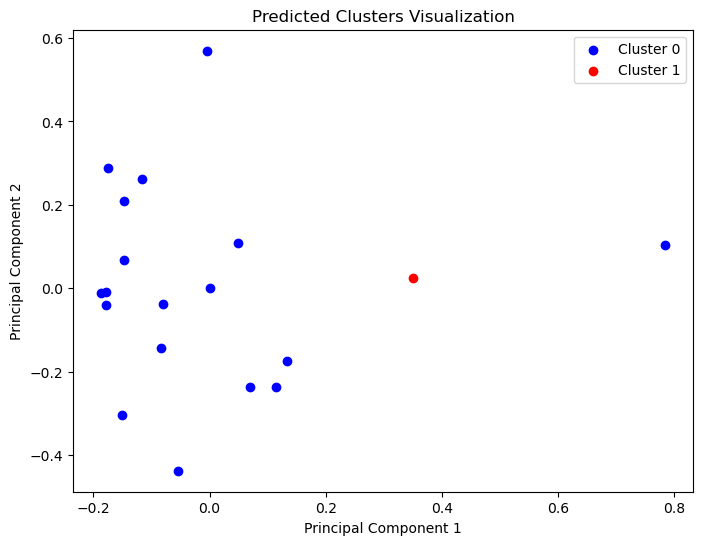

In [42]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
# Reduce dimensionality using PCA for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X.toarray())

# Plot the predicted clusters
plt.figure(figsize=(8, 6))
colors = ['blue', 'red']
for i in range(k):
    plt.scatter(X_pca[y_pred == i, 0], X_pca[y_pred == i, 1], c=colors[i], label=f'Cluster {i}')
plt.title('Predicted Clusters Visualization')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()